In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Employee_Attrition.csv")


df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


In [3]:
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
5,29.766336,No,Travel_Frequently,900.495555,Research & Development,1.805415,NaN,Life Sciences,0.911961,8.434914,...,2.798835,NaN,0.000000,6.694851,1.871592,2.046544,6.092499,8.389254,3.131537,7.060896
6,61.934723,NaN,NaN,1284.456352,Research & Development,2.502578,NaN,Medical,0.842456,11.019992,...,0.809695,80.237136,3.190519,11.226132,NaN,2.198286,NaN,0.000000,0.000000,0.000000
7,27.098235,No,Travel_Rarely,NaN,Research & Development,22.329189,0.923262,Life Sciences,0.888357,10.066385,...,2.062221,75.003287,0.891104,1.058393,1.868045,NaN,0.962310,0.000000,0.000000,0.000000
8,30.379999,NaN,Travel_Frequently,195.346240,Research & Development,NaN,3.209049,Life Sciences,0.834966,13.496344,...,2.156785,91.975003,0.000000,10.088953,1.905135,3.104763,9.894773,7.992665,1.151091,7.080628
9,35.373614,No,Travel_Rarely,1277.914019,Research & Development,28.618060,3.144818,Technical Degree,NaN,12.351803,...,1.933506,86.334628,1.947497,18.805415,3.008464,2.105678,5.959244,6.414024,NaN,6.447820


In [4]:
# Check for null
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [5]:
(df.isnull().sum()/(len(df)))*100

Age                         10.0
Attrition                   10.0
BusinessTravel              10.0
DailyRate                   10.0
Department                  10.0
DistanceFromHome            10.0
Education                   10.0
EducationField              10.0
EmployeeCount               10.0
EmployeeNumber              10.0
EnvironmentSatisfaction     10.0
Gender                      10.0
HourlyRate                  10.0
JobInvolvement              10.0
JobLevel                    10.0
JobRole                     10.0
JobSatisfaction             10.0
MaritalStatus               10.0
MonthlyIncome               10.0
MonthlyRate                 10.0
NumCompaniesWorked          10.0
Over18                      10.0
OverTime                    10.0
PercentSalaryHike           10.0
PerformanceRating           10.0
RelationshipSatisfaction    10.0
StandardHours               10.0
StockOptionLevel            10.0
TotalWorkingYears           10.0
TrainingTimesLastYear       10.0
WorkLifeBa

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
#dropping columns
df = df.drop(['EmployeeNumber', 'Over18', 'DailyRate', 'HourlyRate', 'MonthlyRate'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   Department                1323 non-null   object 
 4   DistanceFromHome          1323 non-null   float64
 5   Education                 1323 non-null   float64
 6   EducationField            1323 non-null   object 
 7   EmployeeCount             1323 non-null   float64
 8   EnvironmentSatisfaction   1323 non-null   float64
 9   Gender                    1323 non-null   object 
 10  JobInvolvement            1323 non-null   float64
 11  JobLevel                  1323 non-null   float64
 12  JobRole                   1323 non-null   object 
 13  JobSatisfaction           1323 non-null   float64
 14  MaritalS

# Attrition column

In [8]:
print(df['Attrition'].head())

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object


In [9]:
#Assessing the 'Attrition' Column and dealing with the missing values
attrition_values = df['Attrition'].unique()

print("Unique values in the 'Attrition' column:", attrition_values)



Unique values in the 'Attrition' column: ['Yes' 'No' nan]


In [10]:
target_column = 'Attrition'
majority_class = df[target_column].value_counts().idxmax()

print(f"The majority class in the '{target_column}' column is: {majority_class}")

The majority class in the 'Attrition' column is: No


In [11]:
# will replace NaN value in Attrition with value No as it is the majority class  
df['Attrition'].fillna('No', inplace=True)

# Print the head of the 'Attrition' column
print(df['Attrition'].head())



0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object


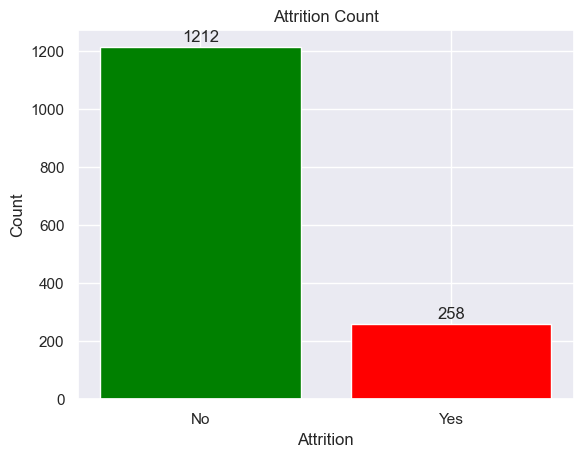

In [12]:

# Count the occurrences of each value in the 'Attrition' column
attrition_counts = df['Attrition'].value_counts()

# Plot a bar chart
plt.bar(attrition_counts.index, attrition_counts.values, color=['green', 'red'])

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count')

# Add annotations
for i, count in enumerate(attrition_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Gender

In [13]:
#Follow the same process for 'Gender'
print(df['Gender'].head(20))

0       Male
1       Male
2       Male
3     Female
4       Male
5       Male
6     Female
7       Male
8       Male
9       Male
10      Male
11    Female
12       NaN
13      Male
14      Male
15       NaN
16      Male
17      Male
18    Female
19      Male
Name: Gender, dtype: object


In [14]:
#Assessing the 'Gender' Column and dealing with the missing values
gender_values = df['Gender'].unique()

print("Unique values in the 'Gender' column:", gender_values)



Unique values in the 'Gender' column: ['Male' 'Female' nan]


In [15]:
target_column = 'Gender'
majority_class = df[target_column].value_counts().idxmax()

print(f"The majority class in the '{target_column}' column is: {majority_class}")

The majority class in the 'Gender' column is: Male


In [16]:
# will replace NaN value in Gender with value Male as it is the majority class  
df['Gender'].fillna('Male', inplace=True)
# Print the updated Attrition column
print(df['Gender'].head())


0      Male
1      Male
2      Male
3    Female
4      Male
Name: Gender, dtype: object


In [17]:
#Follow the same process for 'Gender'
print(df['Gender'].head(20))

0       Male
1       Male
2       Male
3     Female
4       Male
5       Male
6     Female
7       Male
8       Male
9       Male
10      Male
11    Female
12      Male
13      Male
14      Male
15      Male
16      Male
17      Male
18    Female
19      Male
Name: Gender, dtype: object


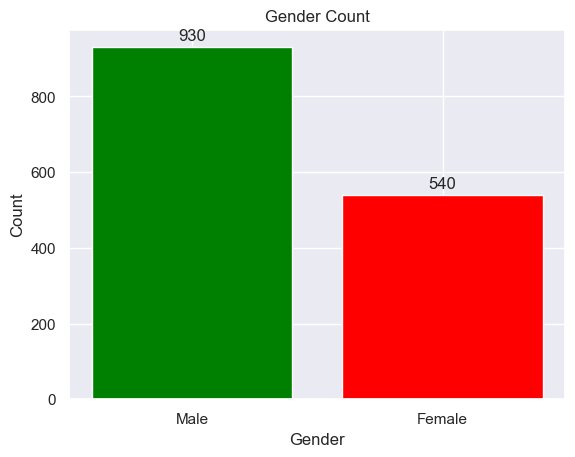

In [18]:
# Count the occurrences of each value in the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Plot a bar chart
plt.bar(gender_counts.index, gender_counts.values, color=['green', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

# Add annotations
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

# Dealing with the missing values in categorical features

In [19]:
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [20]:
# Replace missing values for categorical columns with their respective modes
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [21]:
# Check for null
df.isnull().sum()

Age                         147
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome            147
Education                   147
EducationField                0
EmployeeCount               147
EnvironmentSatisfaction     147
Gender                        0
JobInvolvement              147
JobLevel                    147
JobRole                       0
JobSatisfaction             147
MaritalStatus                 0
MonthlyIncome               147
NumCompaniesWorked          147
OverTime                      0
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtCompany              147
YearsInCurrentRole          147
YearsSinceLastPromotion     147
YearsWithCurrManager        147
dtype: int64

# Dealing with missing values for Non-Categorical features

In [22]:
non_categorical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

print("Non-categorical columns:", non_categorical_columns)


Non-categorical columns: ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


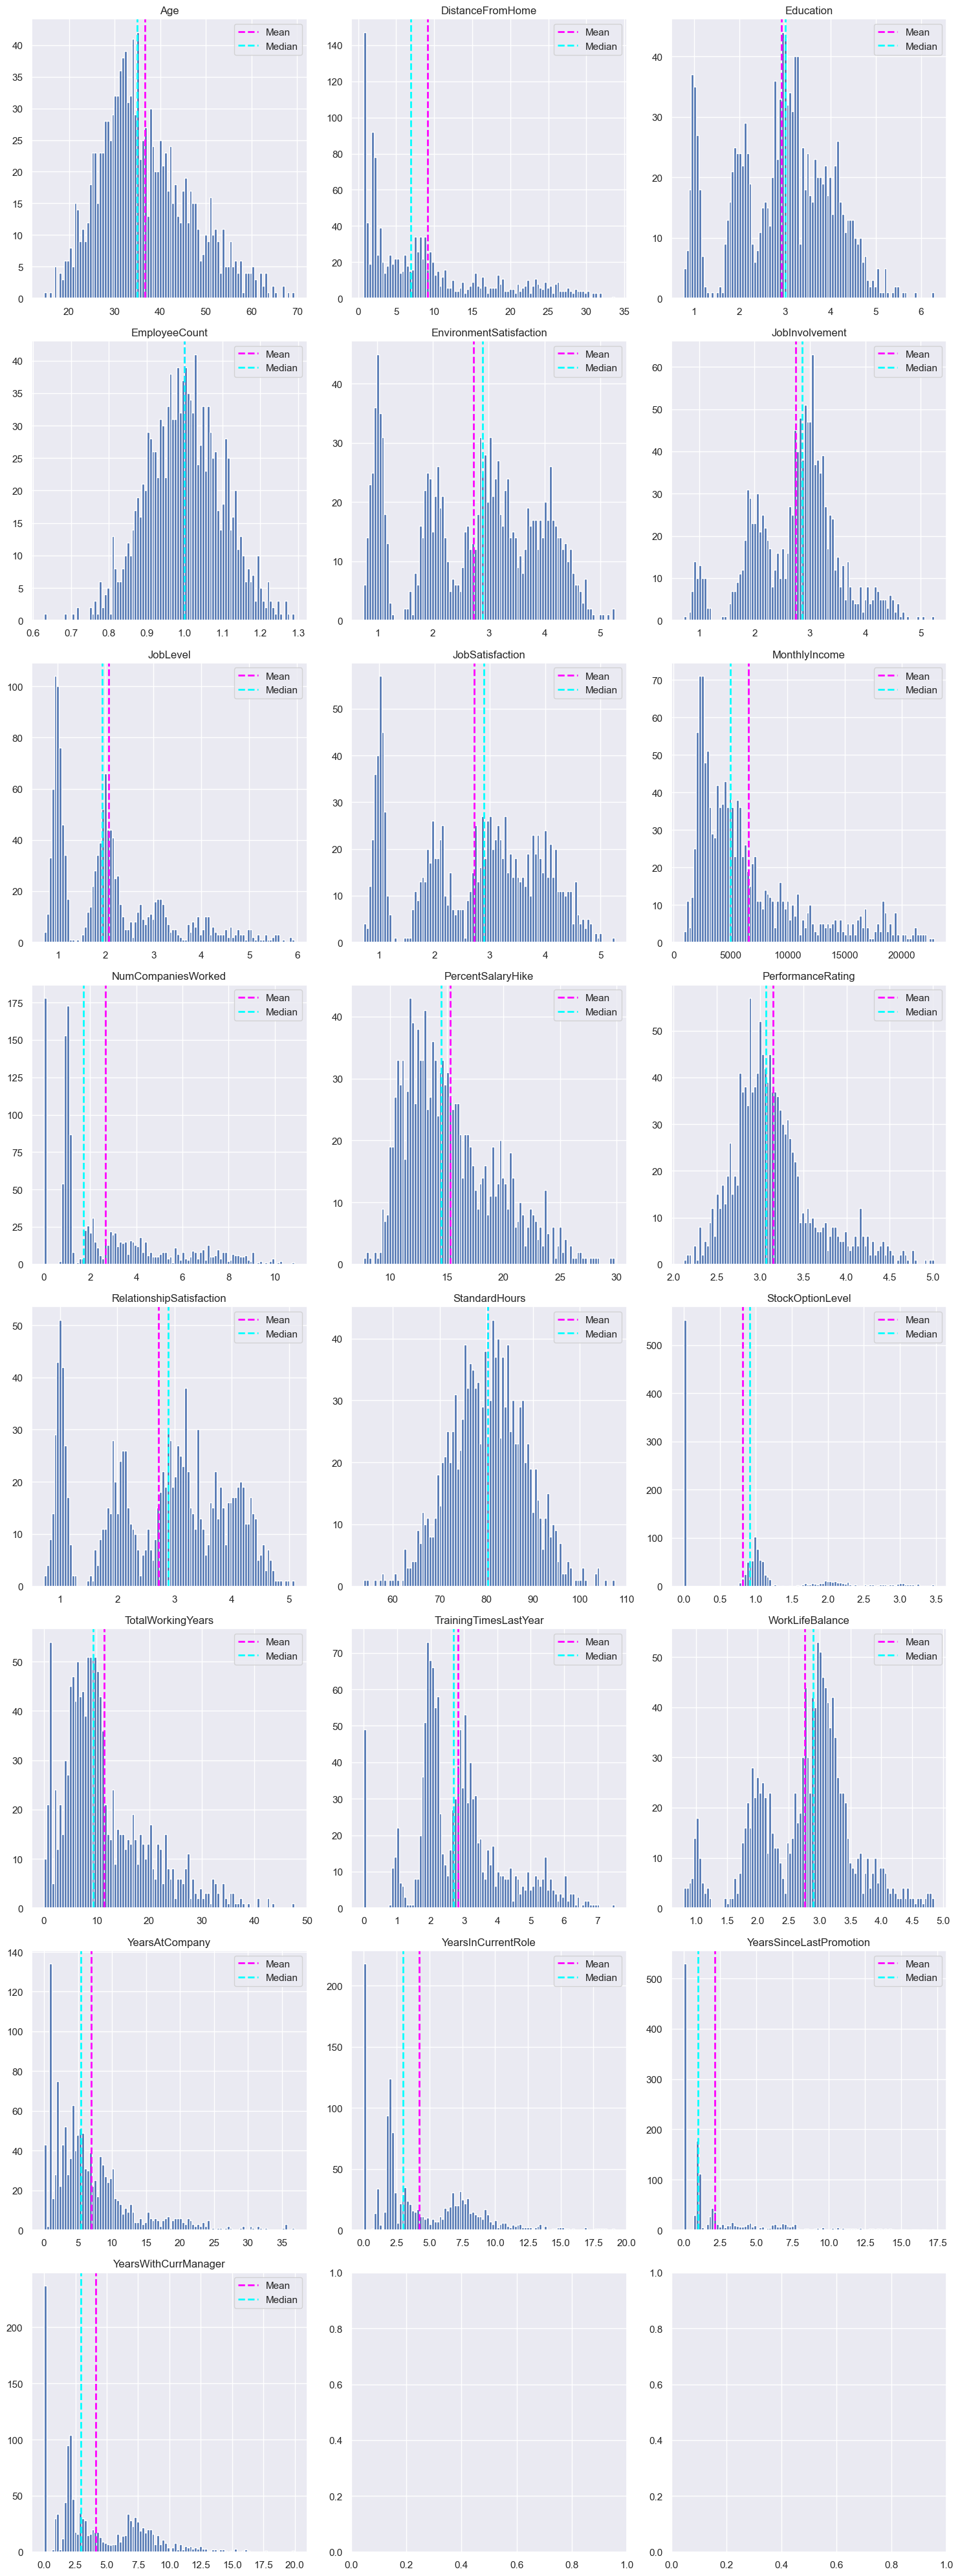

In [23]:
#Creating histograms to visualise normality/skewedness of data 

# Get all numeric features
numeric_features = df.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots, the goal here is to visually arrange the subplots nicely.
num_rows = (len(numeric_features) + 2) // 3
num_cols = min(len(numeric_features), 3)


# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot histograms for each numeric feature
for i, col in enumerate(numeric_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

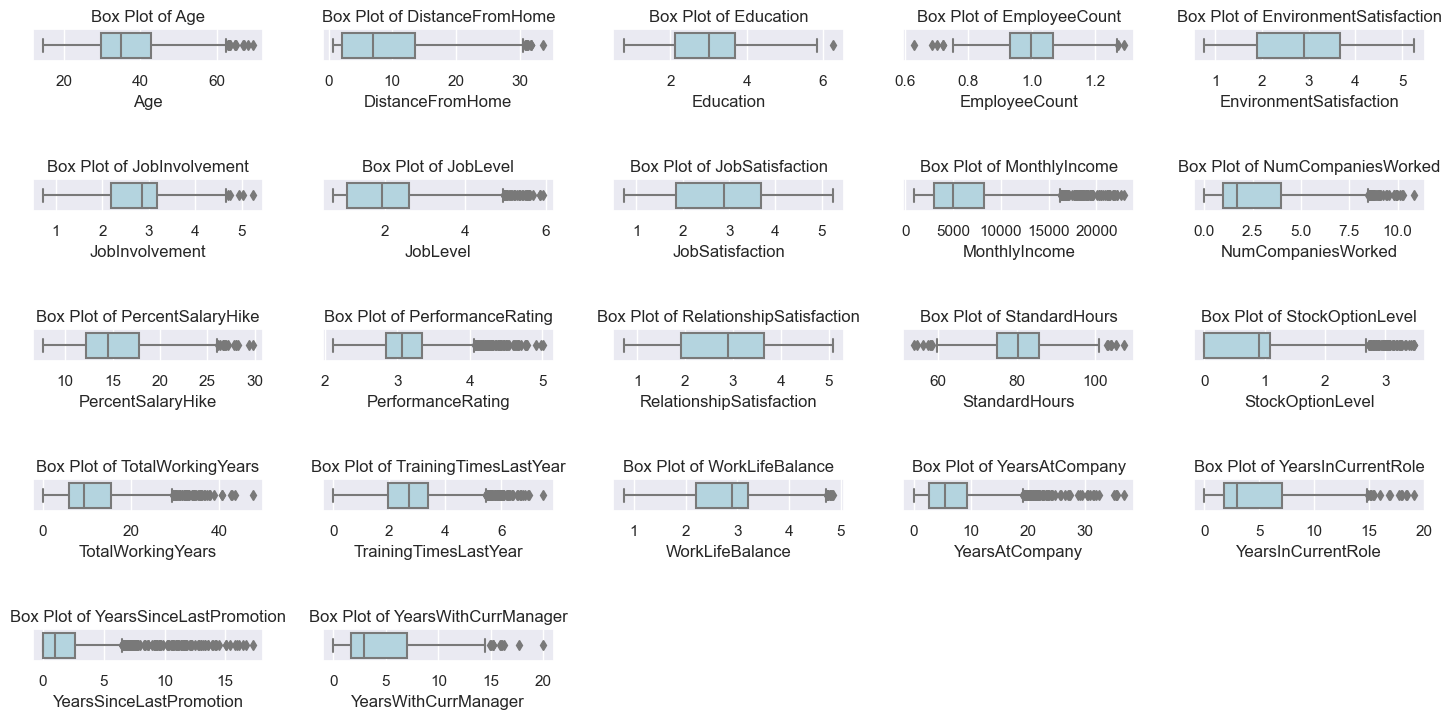

In [24]:
#Creating boxplots to visualise outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Get all numerical columns)
numerical_columns = df[['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# Create subplots for numerical features
num_rows = 5
num_cols = len(numerical_columns.columns) // num_rows + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))
axes = axes.flatten()

# Iterate through numerical features and create box plots
for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(x=col, data=df, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Box Plot of {col}')

# Hide any unused subplots
for j in range(num_cols * num_rows):
    if j >= len(numerical_columns.columns):
        axes[j].axis('off')

plt.tight_layout(pad=3)
plt.show()

In [25]:
#Using the mean to impute missing values in numerical columns with no significant outliers
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame and columns_to_impute is a list of column names
columns_to_impute = ['Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']

# Create a subset of the DataFrame with only the columns to impute
df_subset = df[columns_to_impute]

# Use SimpleImputer to impute missing values with the mean for the specified columns
my_imputer = SimpleImputer(strategy='mean')
df_subset_imputed = pd.DataFrame(my_imputer.fit_transform(df_subset), columns=columns_to_impute)

# Update the original DataFrame with the imputed values
df[columns_to_impute] = df_subset_imputed


In [26]:
#Using the median to impute missing values in numerical columns with significant outliers
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame and columns_to_impute is a list of column names
columns_to_impute = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Create a subset of the DataFrame with only the columns to impute
df_subset = df[columns_to_impute]

# Use SimpleImputer to impute missing values with the mean for the specified columns
my_imputer = SimpleImputer(strategy='median')
df_subset_imputed = pd.DataFrame(my_imputer.fit_transform(df_subset), columns=columns_to_impute)

# Update the original DataFrame with the imputed values
df[columns_to_impute] = df_subset_imputed


In [27]:
# Check for null
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

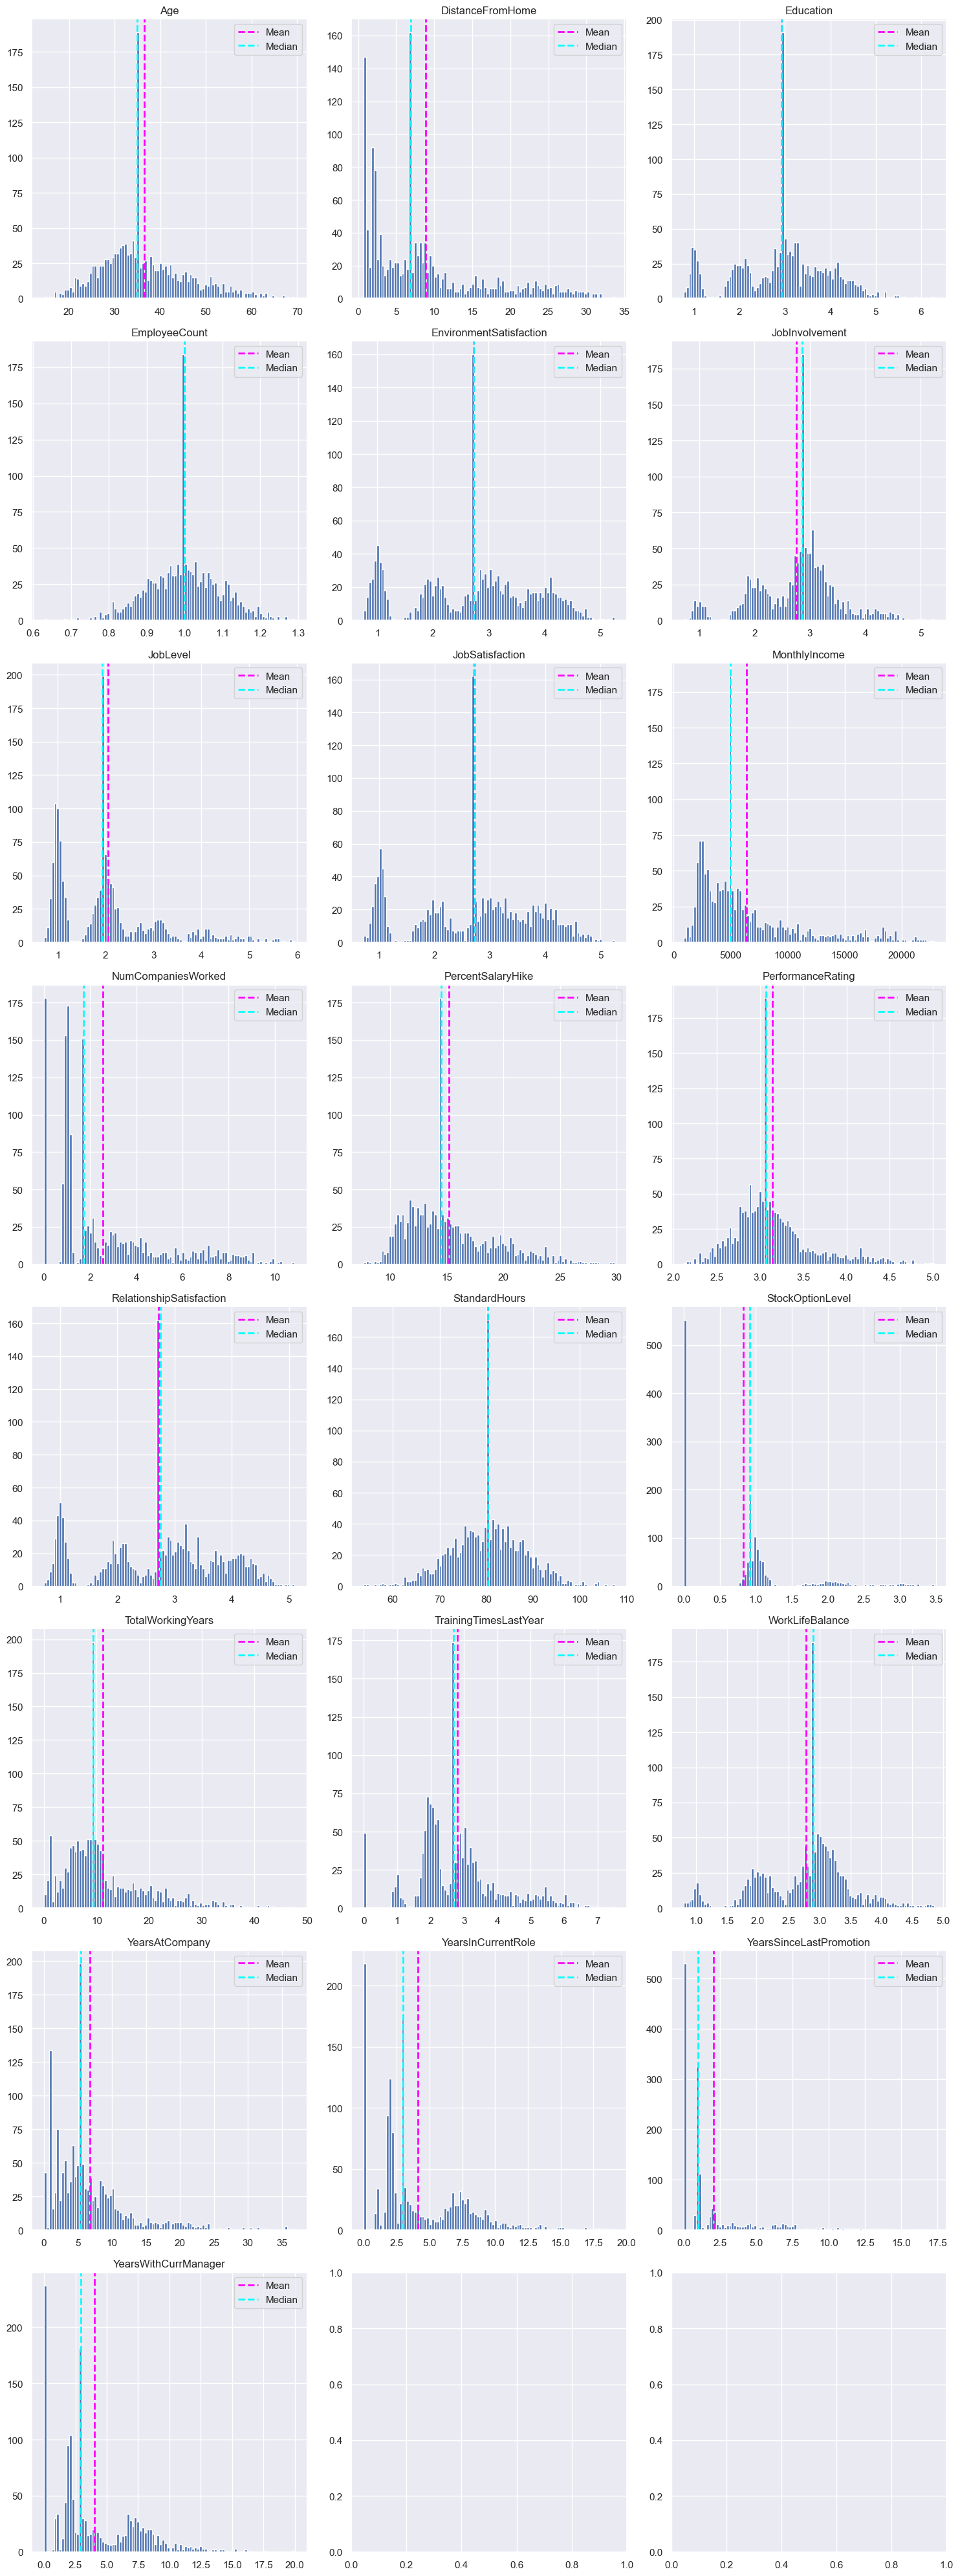

In [28]:
#Creating histograms to visualise normality/skewedness of data 

# Get all numeric features
numeric_features = df.select_dtypes(include='number').columns

# Determine the number of rows and columns for subplots, the goal here is to visually arrange the subplots nicely.
num_rows = (len(numeric_features) + 2) // 3
num_cols = min(len(numeric_features), 3)


# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plot histograms for each numeric feature
for i, col in enumerate(numeric_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [29]:
df.head(20)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,Sales,1.016716,1.770313,Life Sciences,1.033298,2.146294,Male,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,Research & Development,6.920808,1.035333,Life Sciences,0.944859,3.470803,Male,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,Research & Development,2.198662,2.118801,Other,0.810809,3.979420,Male,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,Sales,2.937851,3.670674,Life Sciences,0.822976,3.734705,Female,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,Research & Development,1.988953,1.120496,Medical,0.998949,1.079412,Male,...,2.720431,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
5,29.766336,No,Travel_Frequently,Research & Development,1.805415,2.923447,Life Sciences,0.911961,4.198522,Male,...,2.798835,80.351400,0.000000,6.694851,1.871592,2.046544,6.092499,8.389254,3.131537,7.060896
6,61.934723,No,Travel_Rarely,Research & Development,2.502578,2.923447,Medical,0.842456,2.845946,Female,...,0.809695,80.237136,3.190519,11.226132,2.690934,2.198286,5.422160,0.000000,0.000000,0.000000
7,27.098235,No,Travel_Rarely,Research & Development,22.329189,0.923262,Life Sciences,0.888357,3.194771,Male,...,2.062221,75.003287,0.891104,1.058393,1.868045,2.899807,0.962310,0.000000,0.000000,0.000000
8,30.379999,No,Travel_Frequently,Research & Development,6.920808,3.209049,Life Sciences,0.834966,4.205716,Male,...,2.156785,91.975003,0.000000,10.088953,1.905135,3.104763,9.894773,7.992665,1.151091,7.080628
9,35.373614,No,Travel_Rarely,Research & Development,28.618060,3.144818,Technical Degree,0.998949,2.726443,Male,...,1.933506,86.334628,1.947497,18.805415,3.008464,2.105678,5.959244,6.414024,0.967140,6.447820


In [30]:
for i in cat:
    print('Unique values of ', i, set(df[i]))

Unique values of  Attrition {'No', 'Yes'}
Unique values of  BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Unique values of  Department {'Human Resources', 'Research & Development', 'Sales'}
Unique values of  EducationField {'Other', 'Medical', 'Technical Degree', 'Marketing', 'Life Sciences', 'Human Resources'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Research Scientist', 'Manager', 'Sales Executive', 'Sales Representative', 'Laboratory Technician', 'Healthcare Representative', 'Manufacturing Director', 'Research Director', 'Human Resources'}
Unique values of  MaritalStatus {'Married', 'Divorced', 'Single'}
Unique values of  OverTime {'No', 'Yes'}


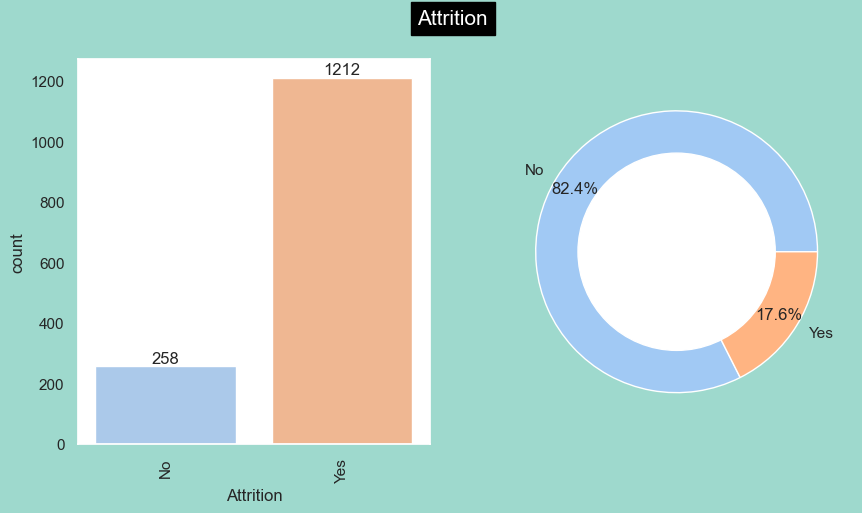

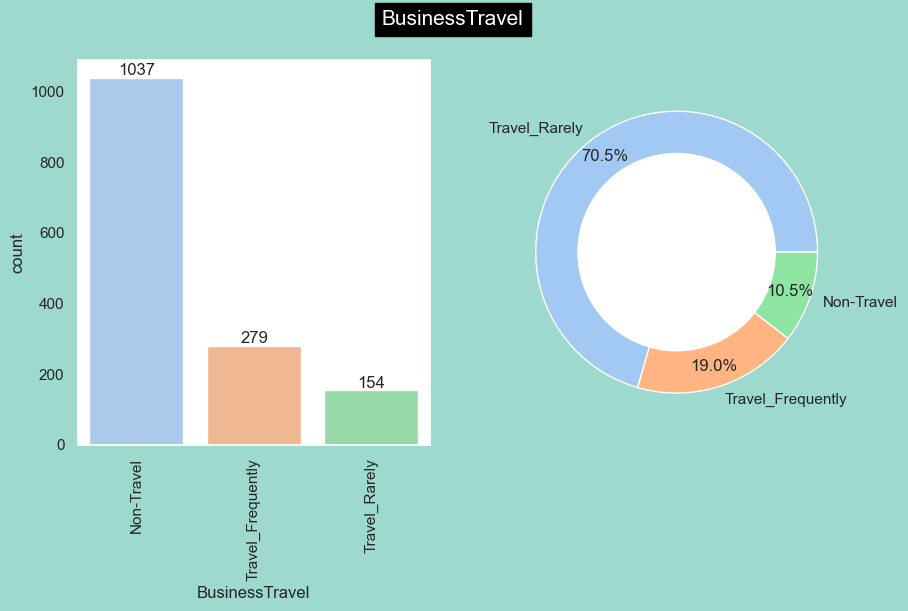

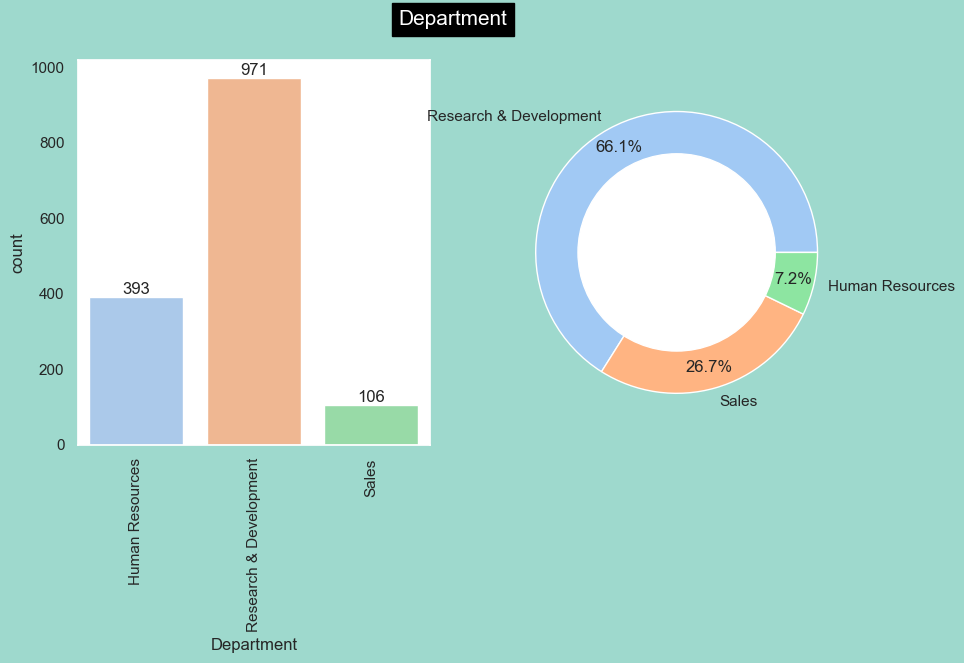

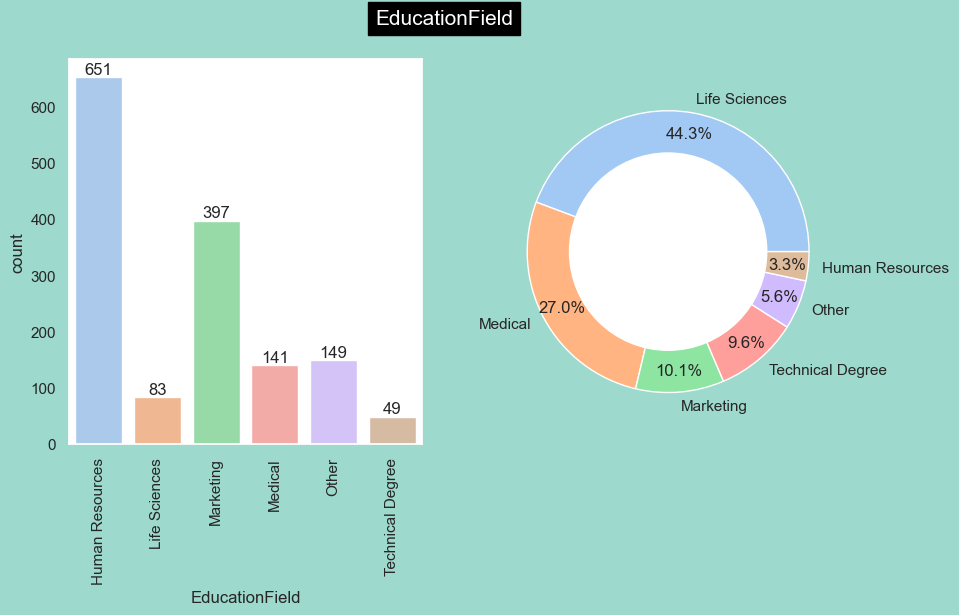

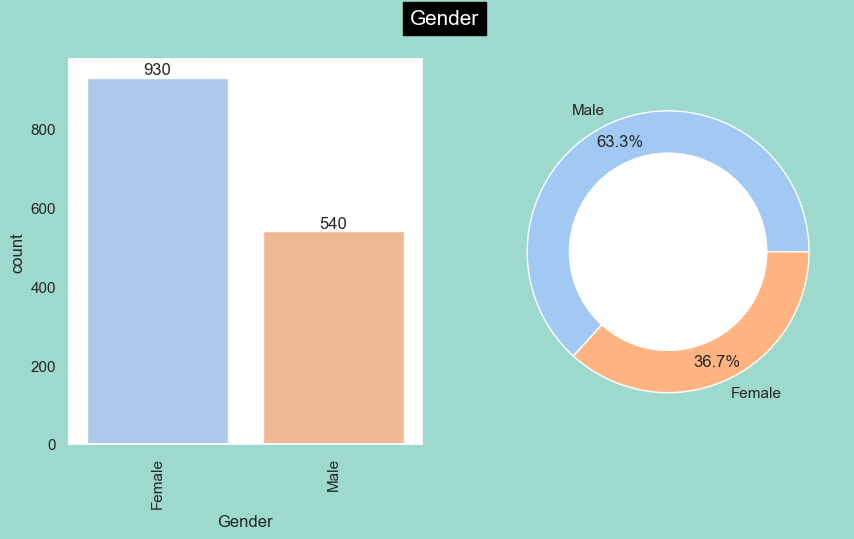

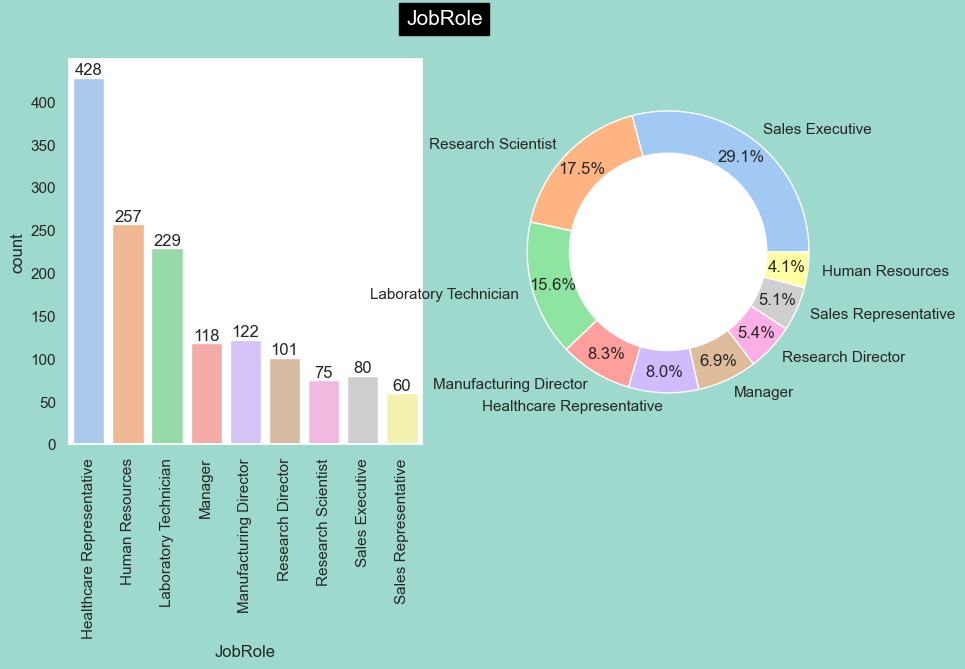

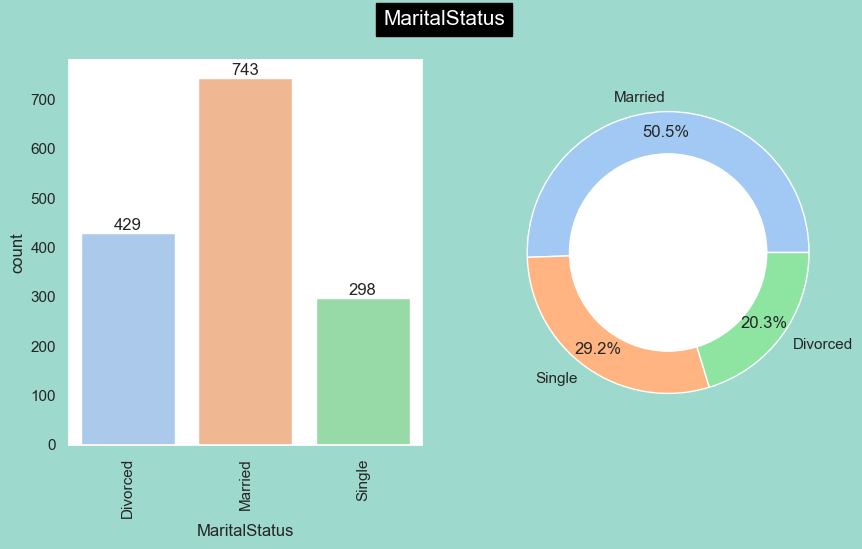

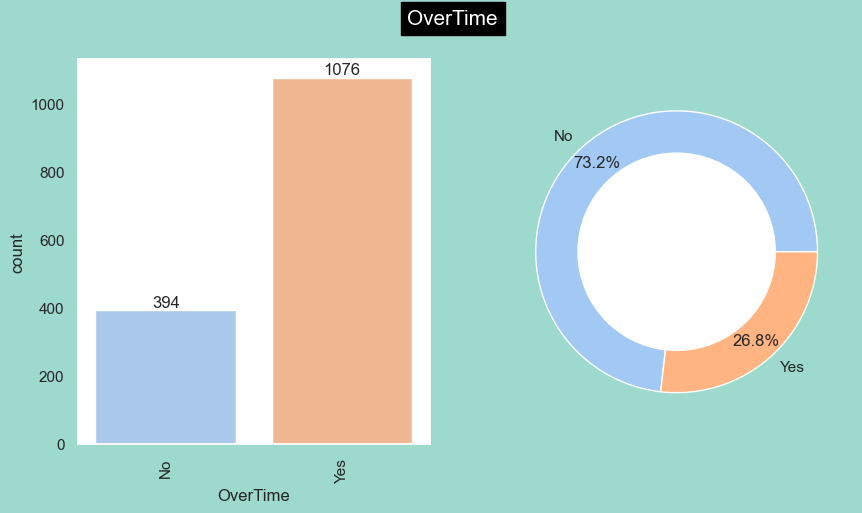

In [31]:
# univariate analysis of categorical data:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"#9ed9cd"})
sns.set_palette("pastel")
for i, col in enumerate(cat):

    fig, axes = plt.subplots(1,2,figsize=(10,5))

    # count of col (countplot)
    
    ax=sns.countplot(data=df, x=col, ax=axes[0])
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities,rotation=90)
    for container in axes[0].containers:
        axes[0].bar_label(container)
        
    #count of col (pie chart)
    
    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05, 0.05)

    axes[1].pie(size, labels=index,autopct='%1.1f%%', pctdistance=0.85)

    # Inner circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col,backgroundcolor='black',color='white',fontsize=15)

    plt.show()

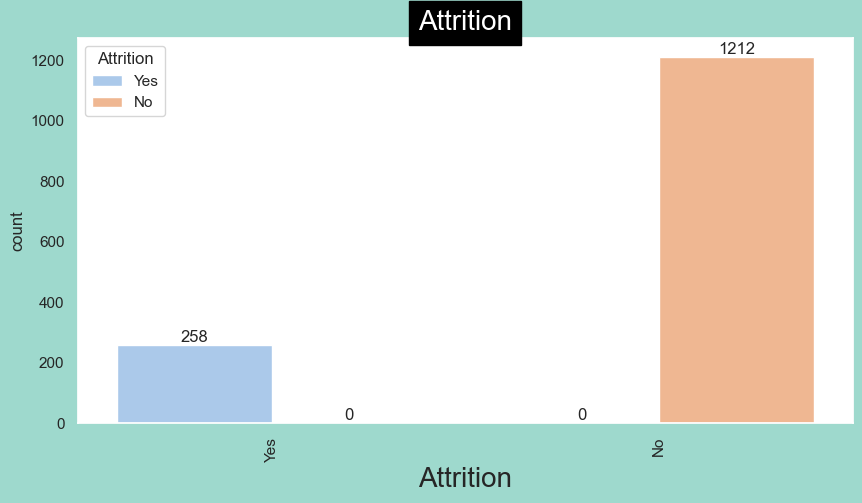

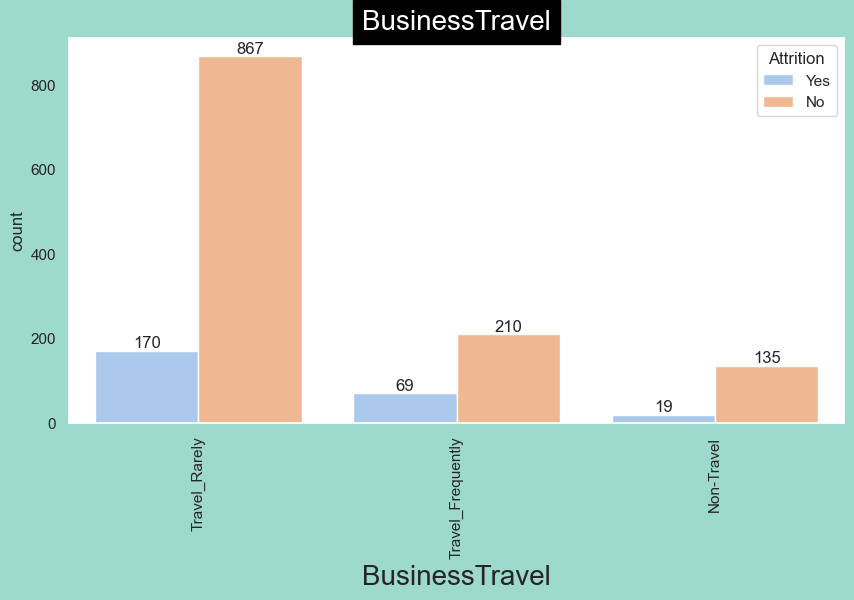

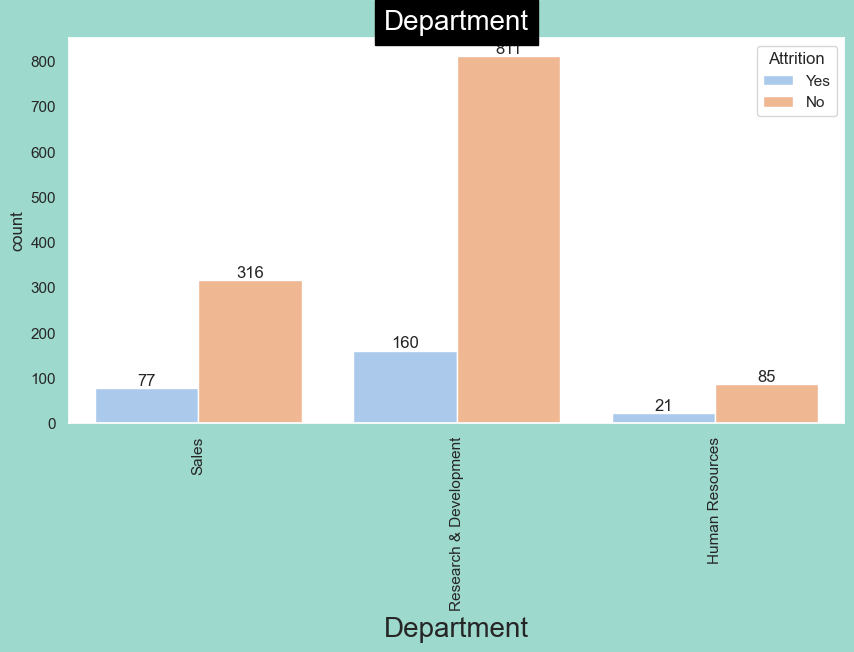

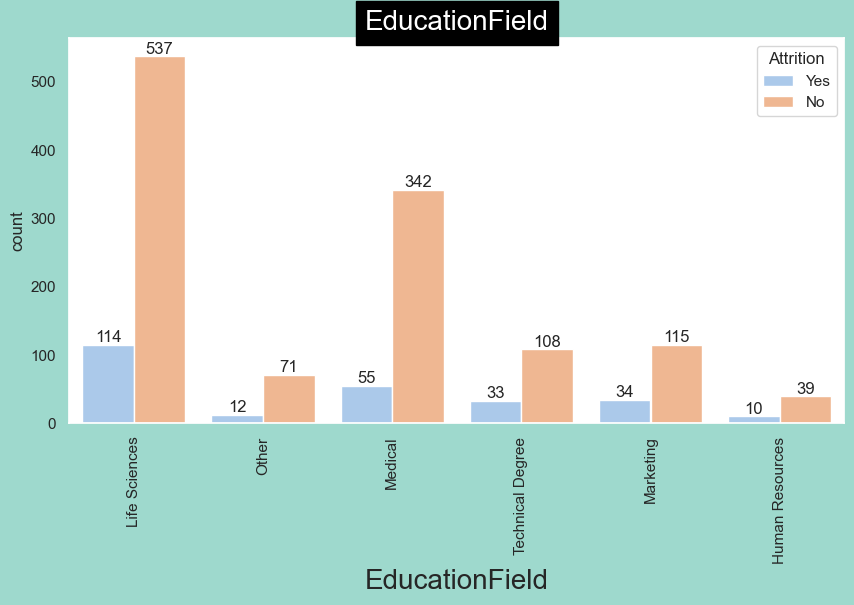

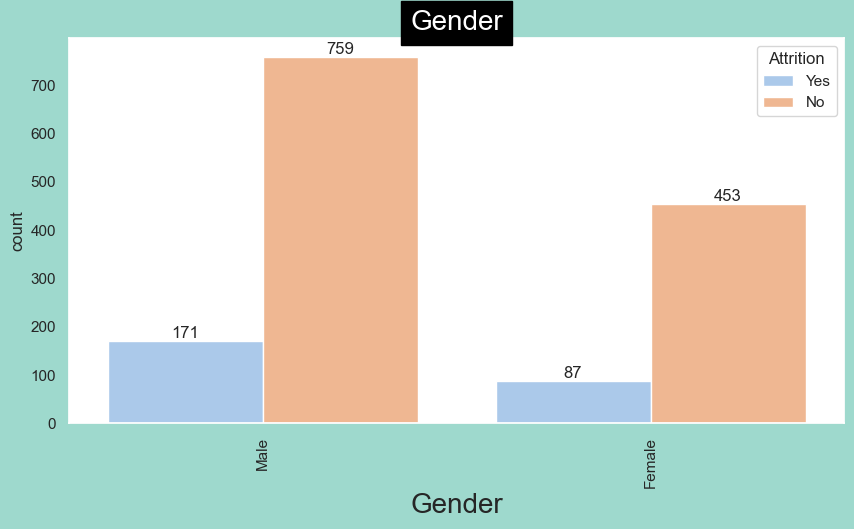

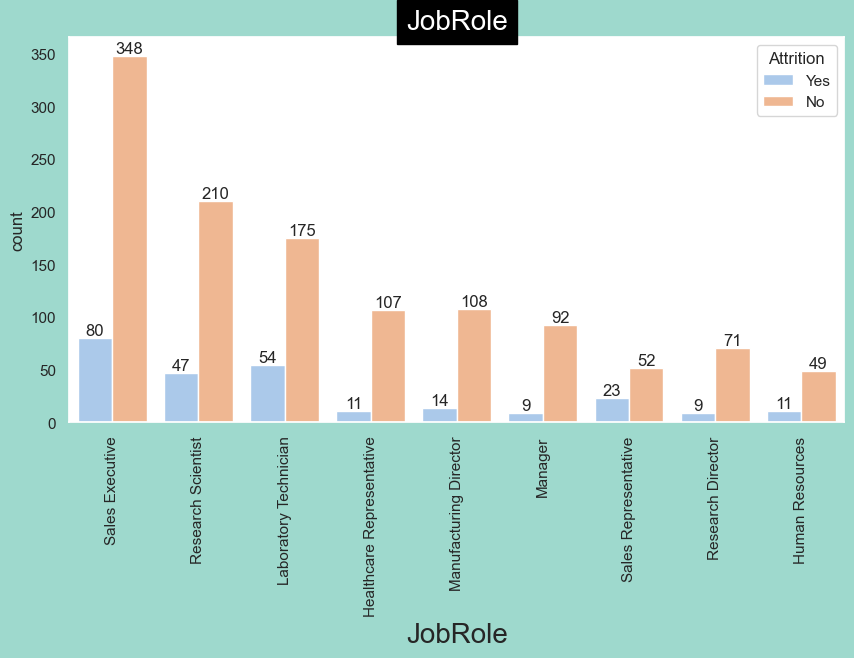

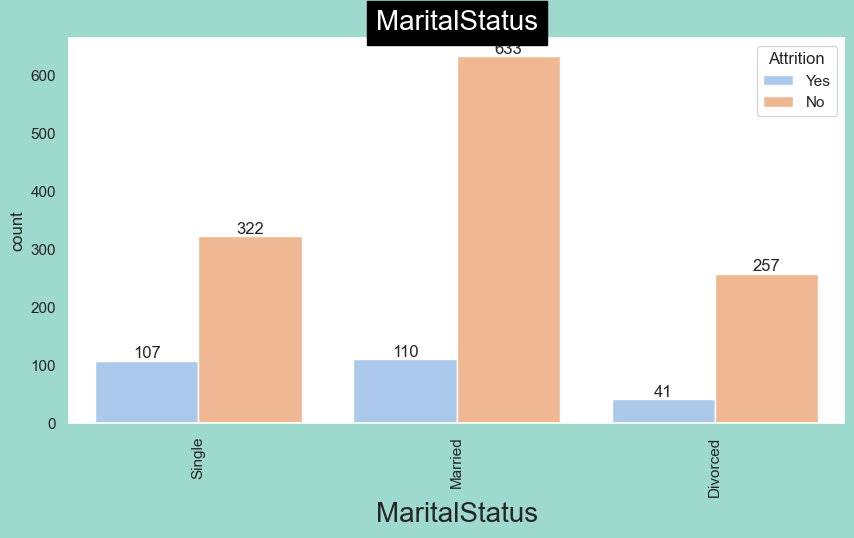

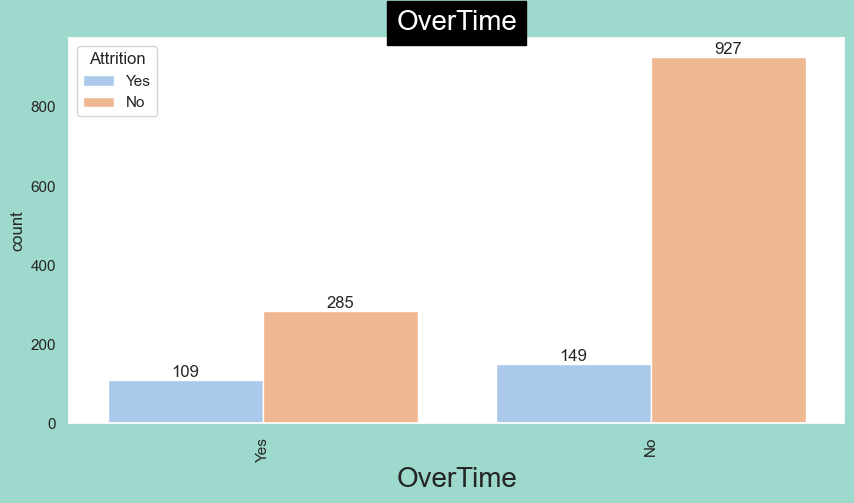

In [32]:
for column in cat : 
    plt.figure(figsize=(10,5))
    
    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

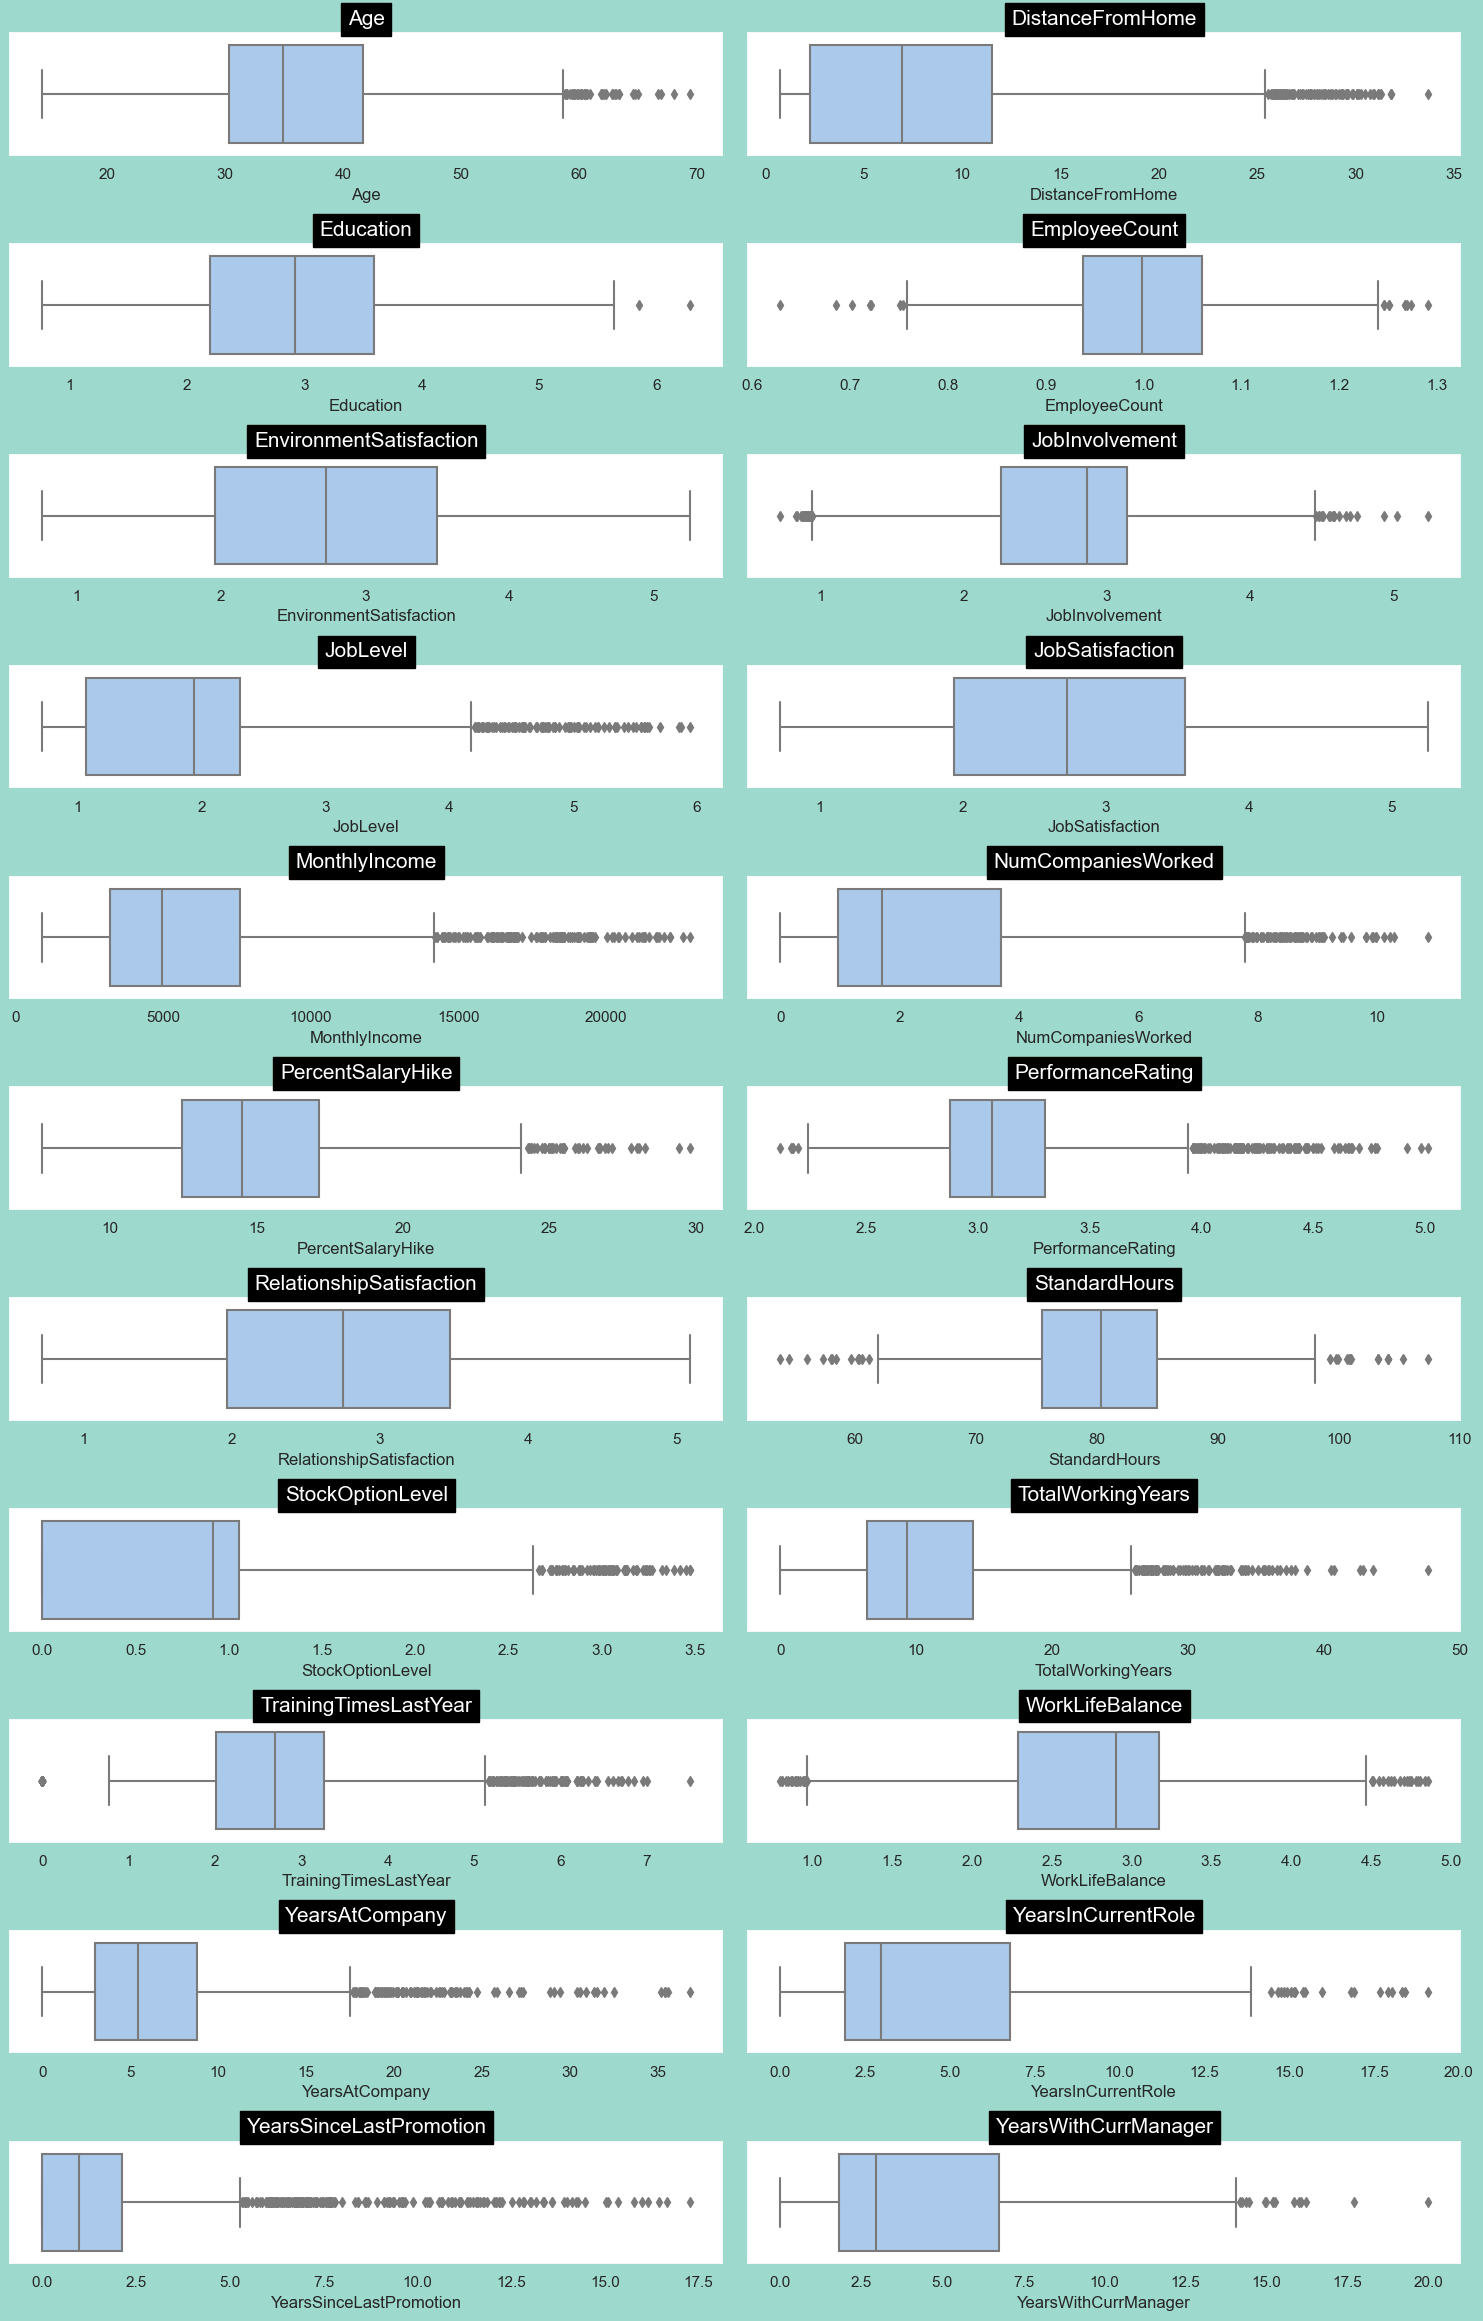

In [33]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()                     
plt.show()

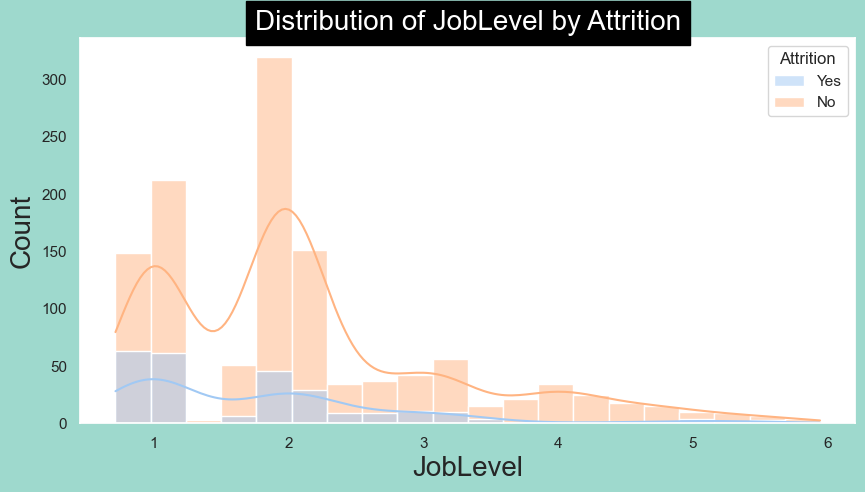

In [34]:
#Plot Job Level on a histogram against Attrition
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='JobLevel', hue='Attrition', bins=20, kde=True)
plt.title('Distribution of JobLevel by Attrition', backgroundcolor='black', color='white', fontsize=20)
plt.xlabel('JobLevel', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.grid()
plt.show()


<Figure size 500x1000 with 0 Axes>

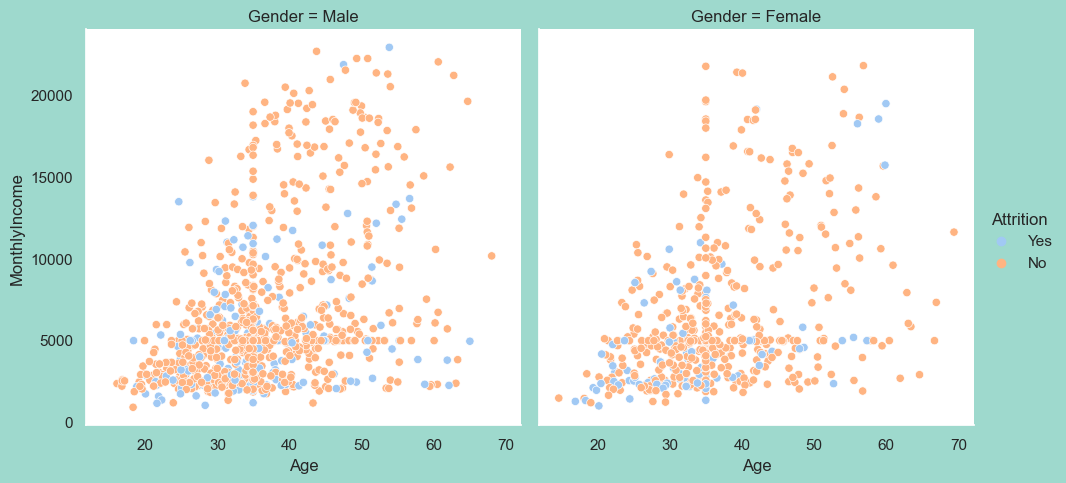

In [35]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

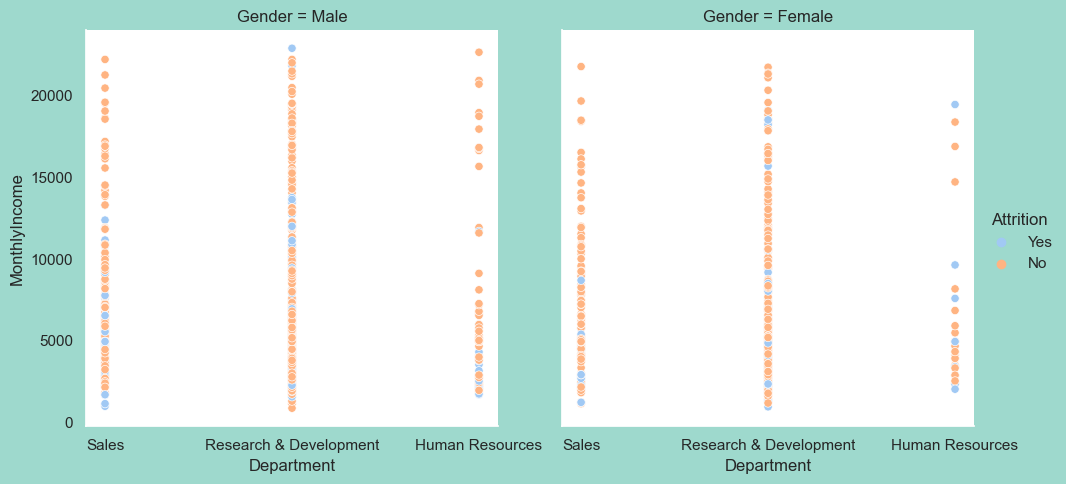

In [36]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

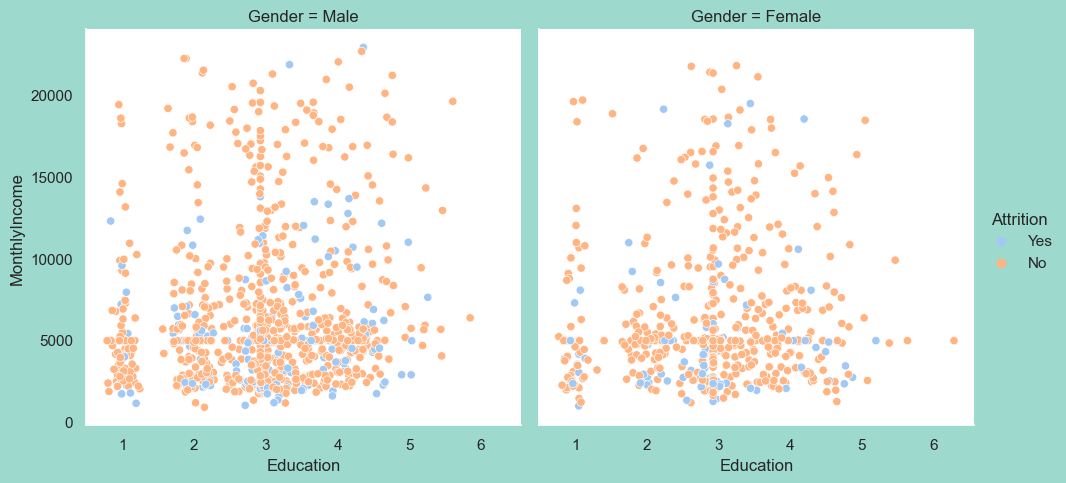

In [37]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

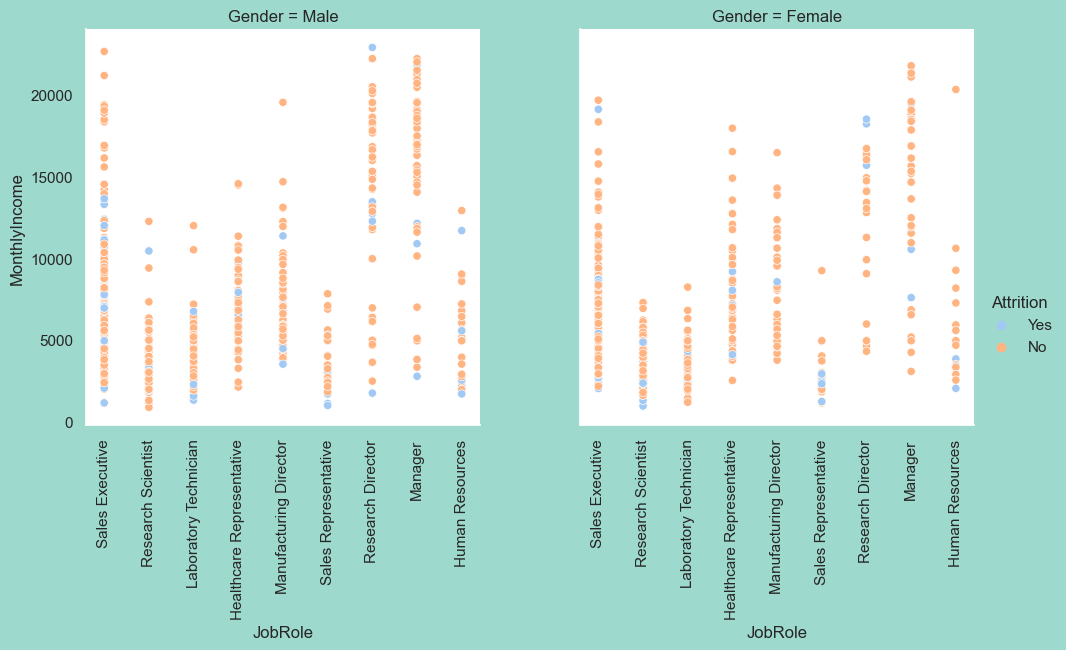

In [38]:
plt.figure(figsize=(5,10))
ax=sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition",col='Gender')
rotation = 90 
for i, ax in enumerate(ax.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
#plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

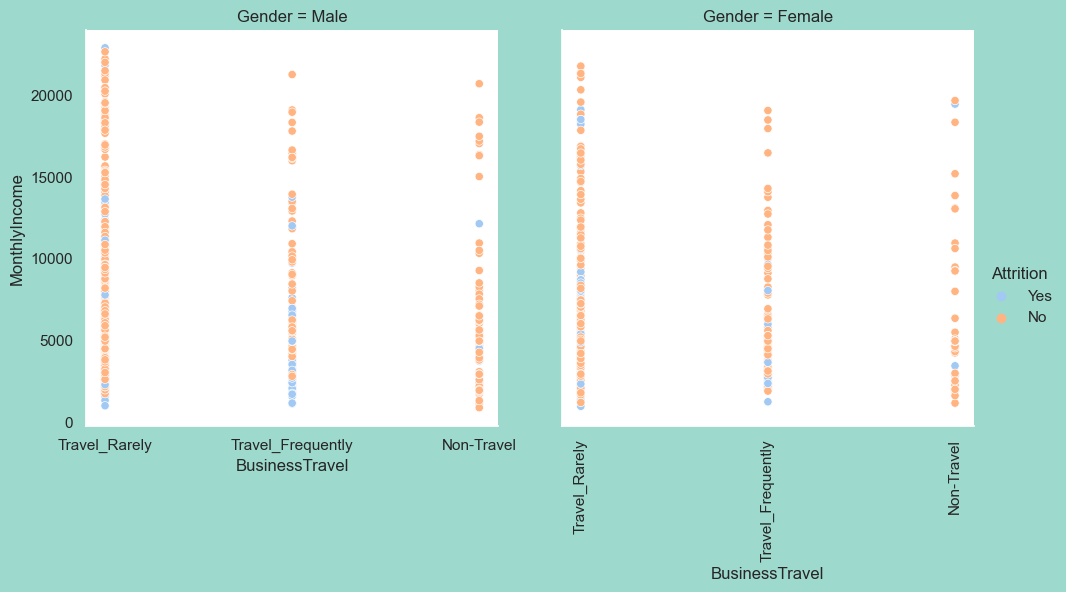

In [39]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition",col='Gender')
plt.xticks(rotation=90)
plt.show()

#Analyse the results here

# Department vs Attrition

In [40]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)
df_dept = df.groupby('Department')['Attrition'].mean().reset_index()
df_dept

,Department,Attrition
0,Human Resources,0.198113
1,Research & Development,0.164779
2,Sales,0.195929


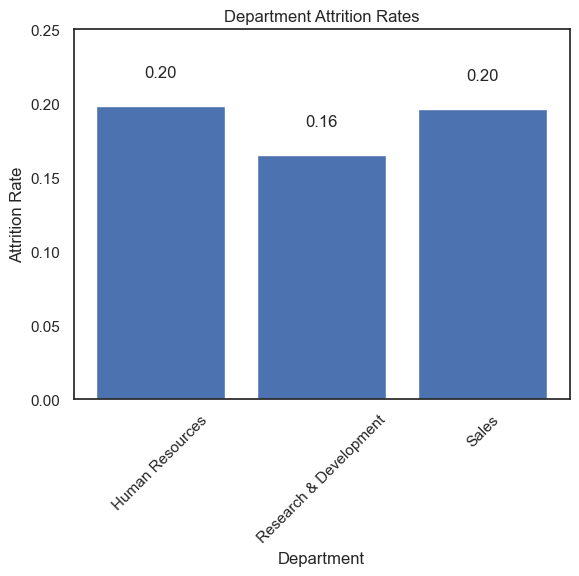

In [46]:
plt.bar(df_dept['Department'], df_dept['Attrition'])
plt.title('Department Attrition Rates')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.25))
plt.xticks(rotation=45)
for i, rate in enumerate(df_dept['Attrition']):
    plt.text(i, rate+0.02, f'{rate:.2f}', ha='center')

plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

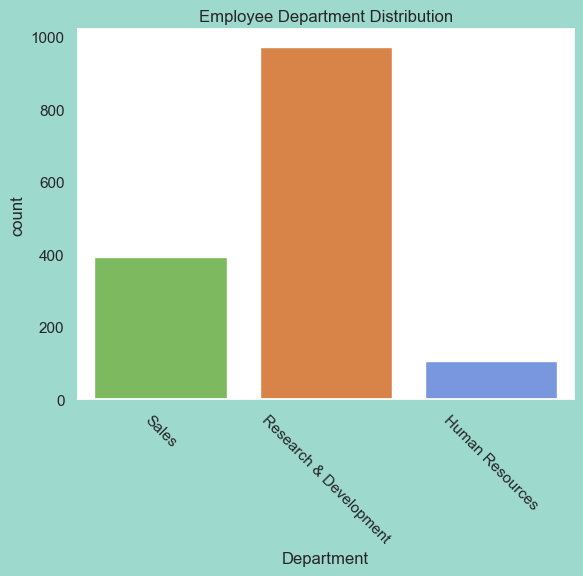

In [41]:
# Employee distribution
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

# Employee Attrition per Department

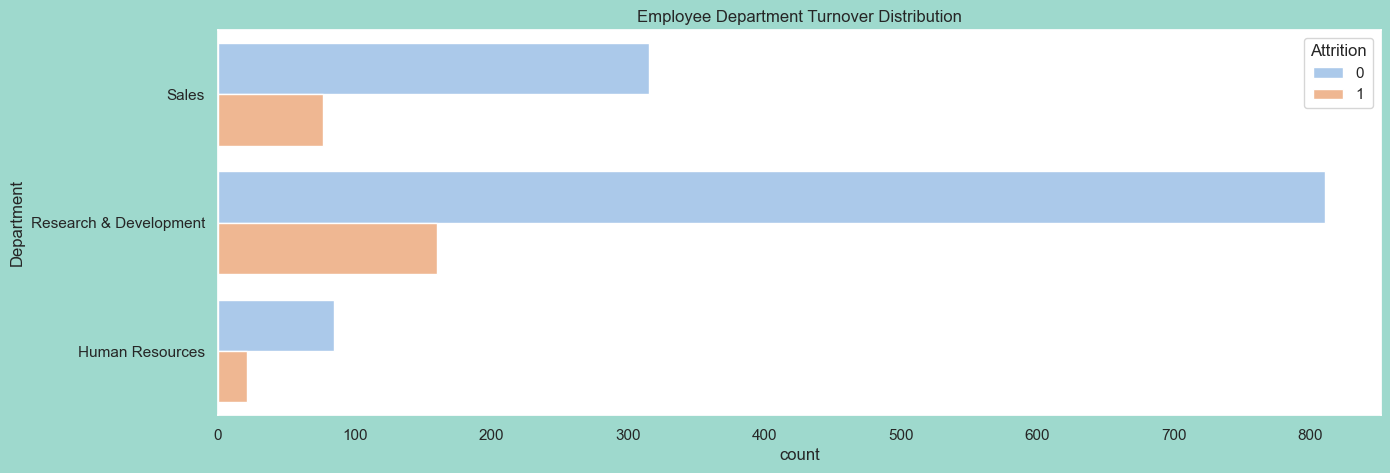

In [42]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='Attrition', data=df).set_title('Employee Department Turnover Distribution');

# Environmnet Satisfaction vs Performance Rating

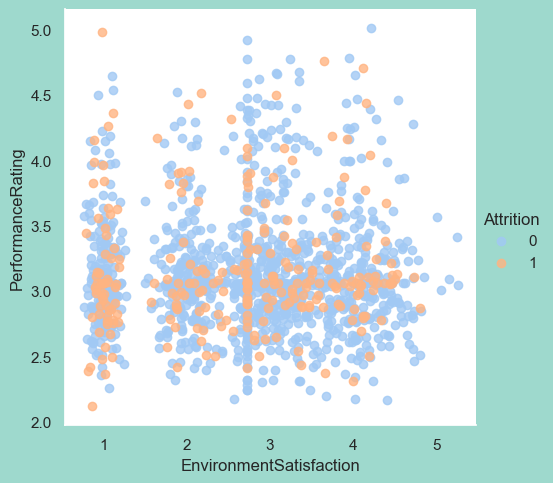

In [43]:
sns.lmplot(x='EnvironmentSatisfaction', y='PerformanceRating', data=df,
           fit_reg=False, # No regression line
           hue='Attrition')   # Color by evolution stage

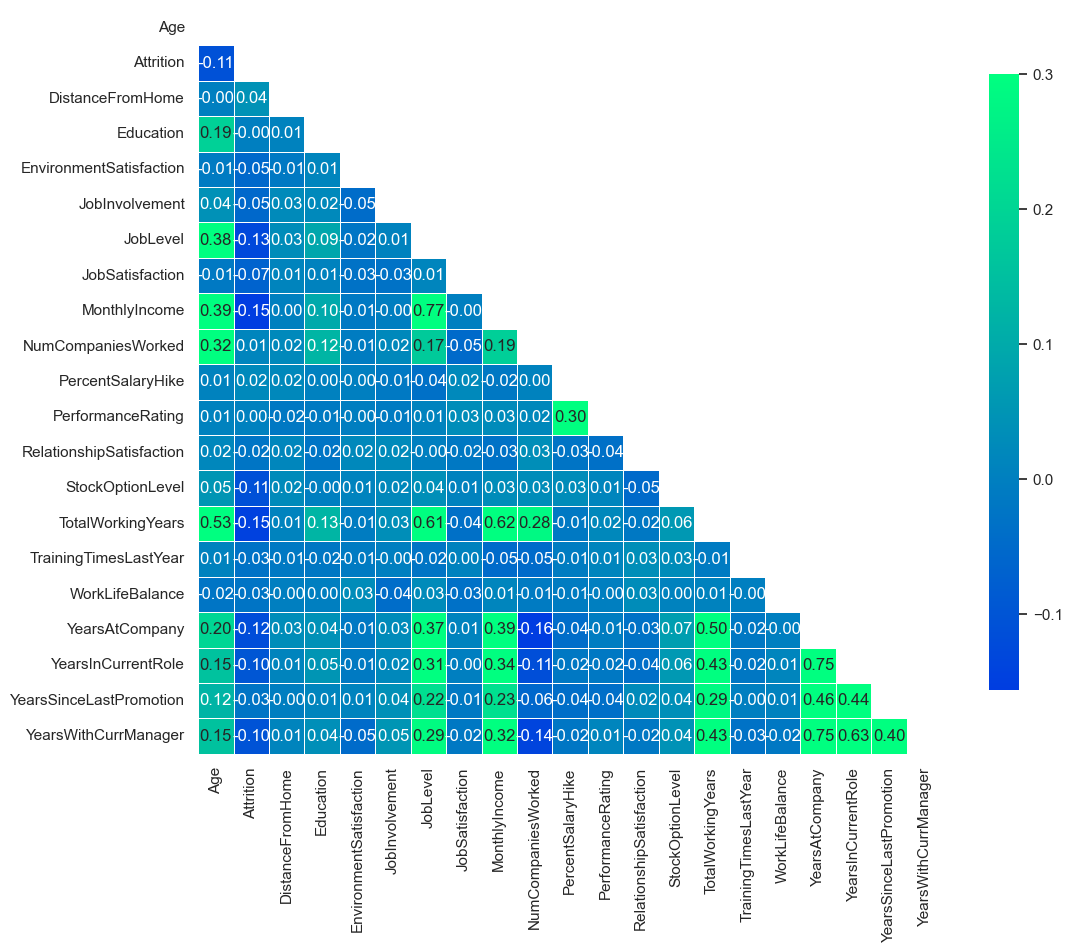

In [44]:
#EDA Multivariate Analysis
#creating a correlation matrix to visualise the connection between features
df2 = df.copy()
df2 = df2.drop(['EmployeeCount','StandardHours'],axis=1)

corr = df2.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

In [45]:
import os
import pandas as pd

# Specify the directory path
directory_path = 'OneDrive/Documents/Github/Integrated_CA2/Integrated-CA2/'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Assuming your DataFrame is named df
df2.to_csv(os.path.join(directory_path, 'DF1_EDA.csv'), index=False)
